# Sales Data Analysis -Year 2019-Generated by e-commerce sites

In [1]:
# import important dependencies
import pandas as pd
import scipy.stats as stats
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns


# Combine 12 .csv files together for further analysis

In [2]:
directory = '../Group Project Sales_MS/CSVs'


In [3]:
contents = os.listdir(directory)
contents

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
files = os.path.join('../Group Project Sales_MS/CSVs', '*.csv')

In [5]:
files = glob.glob(files)

In [6]:
df = pd.concat(map(pd.read_csv, files), ignore_index = True)

In [7]:
df.to_csv('combined_months_data',index= False )

In [8]:
df_sales = pd.read_csv('combined_months_data')


# Data profiling/data inspection

Here we are examining the dimensions, types, and general characteristics of the data within the dataframe. And our aim is to gain insights into the data's structure, identify missing values or inconsistencies, and understand the distribution and relationships between variables

In [9]:
# Check DataFrame shape(number of rows and cols)
df_sales.shape

(186849, 6)

In [10]:
# Check DataFrame info and look at Datatypes for appropriate manipulation
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [11]:
# Drop null values in Dataframe
df_sales.dropna(inplace=True)

In [12]:
# Check for any null values in Data Frame
df_sales.isnull().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [13]:
# read last five  records
df_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186845,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186848,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


# Date Parsing

In [14]:
# Check Date for further processing
df_sales['Order Date']

0           04/19/19 08:46
1         04/07/2019 22:30
2         04/12/2019 14:38
3         04/12/2019 14:38
4           04/30/19 09:27
                ...       
186844      09/17/19 20:56
186845      09/01/19 16:00
186846      09/23/19 07:39
186847      09/19/19 17:30
186848      09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [15]:
# First part of date contains month which we need to extract(0:2)
df_sales =df_sales[df_sales['Order Date'].str[0:2] != 'Or']

In [16]:
# Parse date column to_datetime
df_sales['Order Date'] = df_sales['Order Date'].apply(pd.to_datetime)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [17]:
# Import dependency datetime for further extraction month and full month from date
import datetime as dt

In [18]:
# Parse date column to_datetime
df_sales['Order Date'] = df_sales['Order Date'].apply(pd.to_datetime)


In [19]:
# Extract month and full month from date
df_sales['Month'] = df_sales['Order Date'].dt.month
df_sales['Full_Month']=df_sales['Order Date'].dt.month_name()

# Setting 'Price Each' and 'Quantity Ordered' columns to appropriate format

In [20]:
# Fix 'Price Each' column data type for manipulation
df_sales['Price Each']=  df_sales['Price Each'].astype('float')

In [21]:
#Fix 'Quantity Ordered' column data type for manipulation
df_sales['Quantity Ordered'] = df_sales['Quantity Ordered'].astype('int32')


# Obtain sales volume based on 'Quantity Ordered' and 'Price'

In [22]:
# Create column sales in DataFrame 
# Obtain sales column value by multiplying 'Quantity Ordered' and 'Price Each'
df_sales['sales'] = df_sales['Quantity Ordered'] * df_sales['Price Each']
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Full_Month        185950 non-null  object        
 8   sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 13.5+ MB


In [23]:
# Observe change in DataFrame (Additional sales column)
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99


# Hypothesis Test:

#H0: 
#There is no significant difference in sales volume in terms of sales amount and quantity over the period of 12 months in 2019.

#H1: 
#There is significant difference in sales volume in terms of sales amount and quantity over the period of 12 months in 2019.


In [24]:
# Create groups for applying ANNOVA Hypothesis Test
group_Jan= df_sales[df_sales["Month"]==1]["sales"]
group_Feb= df_sales[df_sales["Month"]==2]["sales"]
group_Mar= df_sales[df_sales["Month"]==3]["sales"]
group_Apr= df_sales[df_sales["Month"]==4]["sales"]
group_May= df_sales[df_sales["Month"]==5]["sales"]
group_Jun= df_sales[df_sales["Month"]==6]["sales"]
group_Jul= df_sales[df_sales["Month"]==7]["sales"]
group_Aug= df_sales[df_sales["Month"]==8]["sales"]
group_Sep= df_sales[df_sales["Month"]==9]["sales"]
group_Oct= df_sales[df_sales["Month"]==10]["sales"]
group_Nov= df_sales[df_sales["Month"]==11]["sales"]
group_Dec= df_sales[df_sales["Month"]==12]["sales"]

We selected One-Way ANOVA(ANalysis Of VAriance) test to compare means of all months for a single variable 'sales'.

In [25]:
# Perform ANOVA test
# ANOVA(ANalysis Of VAriance) test used to compare the means of more than 2 groups
#  ANOVA F and p value
fvalue, pvalue = stats.f_oneway(group_Jan, group_Feb,  group_Mar,  group_Apr,  group_May,  group_Jun,  group_Jul,  group_Aug
                               ,  group_Sep,  group_Oct,  group_Nov,  group_Dec)
print(round(fvalue, 3))
print(round(pvalue, 3))



1.117
0.342


# Correlation Heatmap

<AxesSubplot:>

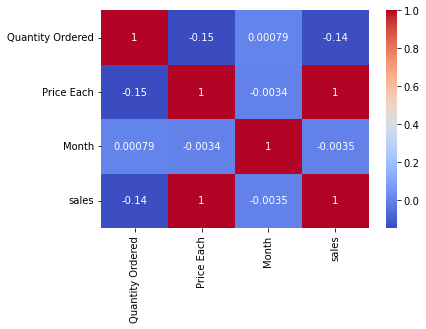

In [26]:
correlation_matrix = df_sales.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Heatmap shows a strong positive sorrelation between sales and price variables

# Exploring the sales trends during the months of year 2019 


In [27]:
monthly_sales = df_sales.groupby(['Month','Full_Month']).sum()[['sales']].reset_index()

In [28]:
monthly_sales

,Month,Full_Month,sales
0,1,January,1822256.73
1,2,February,2202022.42
2,3,March,2807100.38
3,4,April,3390670.24
4,5,May,3152606.75
5,6,June,2577802.26
6,7,July,2647775.76
7,8,August,2244467.88
8,9,September,2097560.13
9,10,October,3736726.88


In [29]:
# Fix 'Month_Full' column data type 
monthly_sales['Full_Month']=  monthly_sales['Full_Month'].astype('str')


In [30]:
# correlations and heatmaps to find factors affects the sales
# correlations are not always cause
# products and sales
# Purchase address and sales

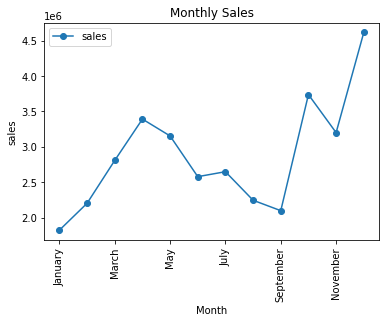

In [31]:
# Sales trend during the year 2019
lines = monthly_sales.plot.line('Full_Month', 'sales', marker='o')
y= monthly_sales['sales']
x= monthly_sales['Full_Month']
plt.xlabel('Month')
plt.ylabel('sales')
plt.title('Monthly Sales')
plt.xticks(rotation=90)
plt.show()


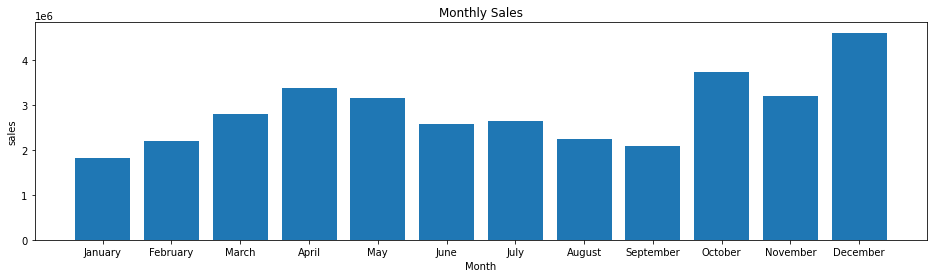

In [32]:
# Finding best month for sales
# Set the figure size (optional)
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.bar(monthly_sales['Full_Month'], monthly_sales['sales'])

# Add labels and title
plt.ylabel('sales')
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.xticks(monthly_sales['Full_Month'])

# Show the plot
plt.show()


Best month for sales is December. Followed by October, April, November and May. 

# Exploring the sales trends by each city 

In [33]:
df_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Full_Month', 'sales'],
      dtype='object')

In [34]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99


In [35]:
# Extract city from 'Purchase Address'
df_sales['Post Code'] = df_sales['Purchase Address'].apply(lambda x: x.split(' ')[-1])
df_sales['State'] = df_sales['Purchase Address'].apply(lambda x: x.split(' ')[-2])
df_sales['City'] = df_sales['Purchase Address'].apply(lambda x: x.split(',')[1])

In [36]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales,Post Code,State,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,75001,TX,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,02215,MA,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,90001,CA,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,90001,CA,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,90001,CA,Los Angeles


In [37]:
# Calculate sales volume by city
sale_city =df_sales.groupby('City').sum()[['sales']].reset_index()
# Fix 'City' column data type 
sale_city['City']=  sale_city['City'].astype('str')
sale_city.head()

,City,sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80


In [38]:
unique_count = sale_city['City'].nunique()
print(unique_count)

9


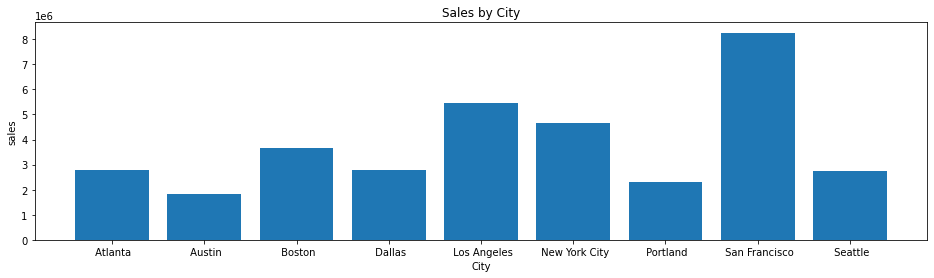

In [39]:
# Finding best city for sales in 2019
# Set the figure size (optional)
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.bar(sale_city['City'], sale_city['sales'])

# Add labels and title
plt.xlabel('City')
plt.ylabel('sales')
plt.title('Sales by City')
plt.xticks(sale_city['City'])

# Show the plot
plt.show()

# Best time during 24 hours to display advertisements to maximize sales

In [40]:
# Extract hours from 'Order Date'
df_sales['Hour'] = df_sales['Order Date'].dt.hour

In [41]:
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Full_Month,sales,Post Code,State,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,23.90,75001,TX,Dallas,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,99.99,02215,MA,Boston,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,600.00,90001,CA,Los Angeles,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,11.99,90001,CA,Los Angeles,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,11.99,90001,CA,Los Angeles,9


In [42]:
Orders_by_hour= df_sales.groupby('Hour').count()[['Order ID']].reset_index()

In [43]:
unique_count = Orders_by_hour['Hour'].nunique()
print(unique_count)

24


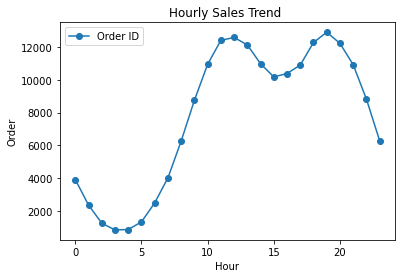

In [44]:
# Hourly sales trend
lines = Orders_by_hour.plot.line('Hour', 'Order ID', marker='o')
y= Orders_by_hour['Order ID']
x= Orders_by_hour['Hour']
plt.xlabel('Hour')
plt.ylabel('Order')
plt.title('Hourly Sales Trend ')
plt.show()


# Groups of Products - better sold together

In [45]:
df_sales['Order ID'] = df_sales['Order ID'].astype('int32')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int32         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Full_Month        185950 non-null  object        
 8   sales             185950 non-null  float64       
 9   Post Code         185950 non-null  object        
 10  State             185950 non-null  object        
 11  City              185950 non-null  object        
 12  Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), objec

In [46]:
# Indexing and grouping multiple orders by products
Multiple_Orders = df_sales[df_sales['Order ID'].duplicated(keep=False)].copy()
Multiple_Orders.loc[:, 'Grouped'] =Multiple_Orders.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [47]:
# dropping any duplicate results for unique combination counts
Multiple_Orders =  Multiple_Orders[['Order ID', 'Grouped']].drop_duplicates()

In [48]:
Multiple_Orders  = Multiple_Orders.sort_values('Order ID', ascending= False)
Multiple_Orders.head()

,Order ID,Grouped
55469,319631,"34in Ultrawide Monitor,Lightning Charging Cable"
55433,319596,"iPhone,Lightning Charging Cable"
55420,319584,"iPhone,Wired Headphones"
55391,319556,"Google Phone,Wired Headphones"
55370,319536,"Macbook Pro Laptop,Wired Headphones"


In [49]:
Multiple_Orders.shape

(7136, 2)

In [50]:
# import iteratros and counters
from itertools import combinations
from collections import Counter

In [51]:
results_df = pd.DataFrame(columns=['Products', 'Number'])

In [52]:
# Products order together
# Number of orders on certain combinations
pcount = Counter()

for prod in Multiple_Orders['Grouped']:
    prod_list = prod.split(',')
    pcount.update(Counter(combinations(prod_list,2)))
    
    
for prod, pcount in pcount.most_common(10):
    print(prod,': ',pcount)
    results_df = results_df.append({'Products': prod, 'Number': pcount}, ignore_index=True)
results_df  = results_df.sort_values('Number')

('iPhone', 'Lightning Charging Cable') :  1005
('Google Phone', 'USB-C Charging Cable') :  987
('iPhone', 'Wired Headphones') :  447
('Google Phone', 'Wired Headphones') :  414
('Vareebadd Phone', 'USB-C Charging Cable') :  361
('iPhone', 'Apple Airpods Headphones') :  360
('Google Phone', 'Bose SoundSport Headphones') :  220
('USB-C Charging Cable', 'Wired Headphones') :  160
('Vareebadd Phone', 'Wired Headphones') :  143
('Lightning Charging Cable', 'Wired Headphones') :  92


In [53]:
# TOP 10 products: most often sold together
#('iPhone', 'Lightning Charging Cable') :  1005
#('Google Phone', 'USB-C Charging Cable') :  987

In [54]:
# change objects to data types for further manipulation.
results_df ['Products'] =results_df ['Products'].astype(str)
results_df ['Number'] =results_df ['Number'].astype(int)

In [55]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 9 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  10 non-null     object
 1   Number    10 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 200.0+ bytes


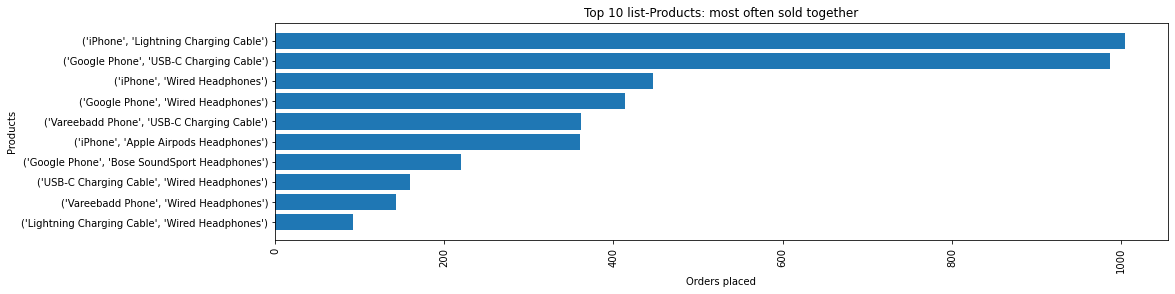

In [56]:
# Barh graph to compare which products are best sold together
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.barh(results_df['Products'], results_df['Number'])

# Add labels and title
plt.xlabel('Orders placed')
plt.ylabel('Products')
plt.title('Top 10 list-Products: most often sold together')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Phones and their accessories were the products mostly sold together.

# Grouping products by price to triangulate the affect of price on sales

In [57]:
# Group products by price
Product_by_price = df_sales.groupby('Product').mean()[['Price Each']].reset_index()
Product_by_price  = Product_by_price.sort_values('Price Each')


In [58]:
Product_by_price.head()

,Product,Price Each
5,AAA Batteries (4-pack),2.99
4,AA Batteries (4-pack),3.84
15,USB-C Charging Cable,11.95
17,Wired Headphones,11.99
12,Lightning Charging Cable,14.95


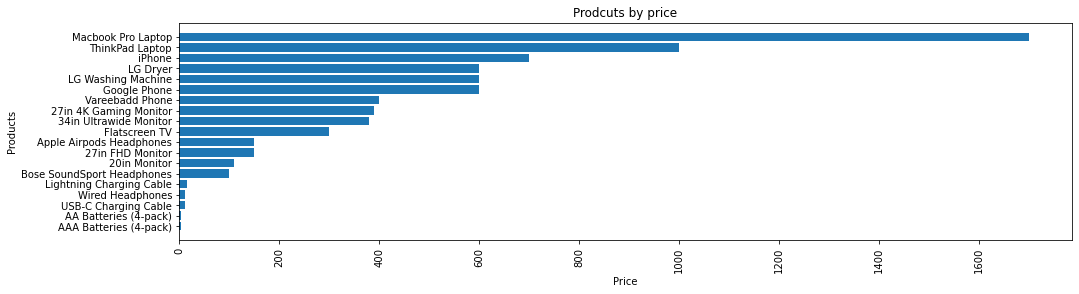

In [59]:
# Barh graph to compare which products are best sold together
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.barh(Product_by_price ['Product'], Product_by_price ['Price Each'])

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Products')
plt.title('Prodcuts by price')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Most expensive products are Macbook Pro Laptops, followed by Iphone and ThinkPad Laptops

# Best Sold Products during the year 2019

In [60]:
 #Most Sold Products
Product_quantity =df_sales.groupby('Product').sum()[['Quantity Ordered']].reset_index()
Product_quantity  = Product_quantity.sort_values('Quantity Ordered', )


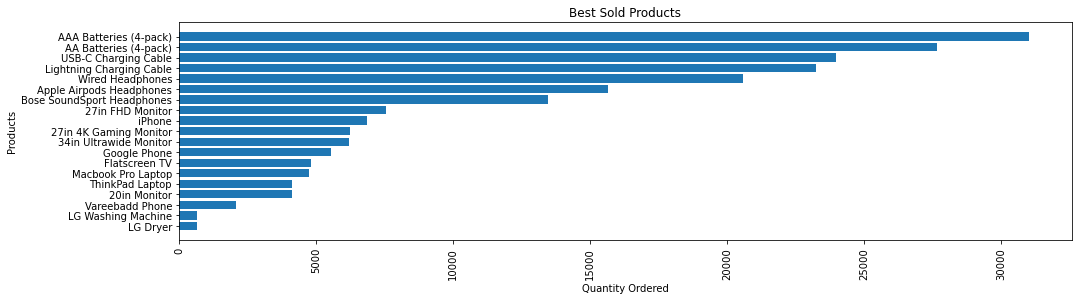

In [61]:
# Barh graph to compare which products are best sold together
plt.figure(figsize=(16, 4))
# Plot the bar graph
plt.barh(Product_quantity['Product'], Product_quantity['Quantity Ordered'])

# Add labels and title
plt.xlabel('Quantity Ordered')
plt.ylabel('Products')
plt.title('Best Sold Products')
plt.xticks(rotation=90)

# Show the plot
plt.show()

Best sold products are AAA Batteries (4-pack), AA Batteries (4-pack) and USB-C Charging Cable. Which shows the cheap products were sold in bulk which clearly indicates price affected the amount of sales